### OpenI Dataset - Exploratory Data Analysis

**Complete data analysis and exploration notebook** for understanding your dataset thoroughly.

#### 🎯 What This Notebook Covers:
1. **Dataset Overview** - Complete structure and content analysis
2. **Text Analysis** - Medical report patterns and language understanding
3. **Image Analysis** - X-ray image quality and characteristics assessment
4. **Data Quality** - Comprehensive quality evaluation and issue identification
5. **Statistical Analysis** - Distribution patterns and data insights
6. **Medical Content** - Clinical terminology and classification analysis
7. **Action Plan** - Clear next steps for model development

This is your complete data analysis foundation for building medical report generation models! 🚀

In [1]:
# Import libraries we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_from_disk
from PIL import Image
import io
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Make plots look nice
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries loaded successfully!")

/Users/pujasaha/Documents/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Libraries loaded successfully!


### Step 1: Load and Understand the Dataset

In [2]:
# Load your locally cached dataset
print("Loading OpenI dataset from local cache...")
dataset = load_from_disk("/Users/pujasaha/Documents/openi/data/openi_dataset")

print(f"✅ Dataset loaded!")
print(f"📈 Total samples: {len(dataset)}")
print(f"📋 Columns: {list(dataset.features.keys())}")
print(f"💾 Dataset size: ~2GB")

Loading OpenI dataset from local cache...
✅ Dataset loaded!
📈 Total samples: 3851
📋 Columns: ['uid', 'MeSH', 'Problems', 'image', 'indication', 'comparison', 'findings', 'impression', 'img_frontal', 'img_lateral']
💾 Dataset size: ~2GB


### Step 2: Look at a Sample - What Does a Record Look Like?

In [4]:
# Let's look at one example to understand the data structure
sample = dataset[0]

print("🔬 SAMPLE MEDICAL REPORT:")
print("=" * 50)
print(f"📝 Case ID: {sample['uid']}")
print(f"🏷️  Classification: {sample['MeSH']}")
print(f"🩺 Problems: {sample['Problems']}")
print(f"📸 Image Type: {sample['image']}")
print(f"❓ Indication: {sample['indication']}")
print(f"🔄 Comparison: {sample['comparison']}")
print()
print(f"🔍 FINDINGS (first 200 chars):")
print(f"{sample['findings'][:200]}...")
print()
print(f"💡 IMPRESSION:")
print(f"{sample['impression']}")
print()
print(f"📷 Images: Frontal ({len(sample['img_frontal'])} bytes), Lateral ({len(sample['img_lateral'])} bytes)")

🔬 SAMPLE MEDICAL REPORT:
📝 Case ID: 1
🏷️  Classification: normal
🩺 Problems: normal
📸 Image Type: Xray Chest PA and Lateral
❓ Indication: Positive TB test
🔄 Comparison: None.

🔍 FINDINGS (first 2000 chars):
The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax....

💡 IMPRESSION:
Normal chest x-XXXX.

📷 Images: Frontal (232228 bytes), Lateral (181766 bytes)


### Step 3: Basic Statistics - Understanding Data Scale

In [5]:
# Convert to pandas for easier analysis
df = dataset.to_pandas()

print("📊 BASIC DATASET STATISTICS")
print("=" * 40)
print(f"Total records: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print()

# Check data types
print("📋 Column Information:")
for col in df.columns:
    if col not in ['img_frontal', 'img_lateral']:  # Skip image columns for now
        non_null = df[col].notna().sum()
        print(f"  {col}: {non_null}/{len(df)} records ({non_null/len(df)*100:.1f}% complete)")

📊 BASIC DATASET STATISTICS
Total records: 3851
Total columns: 10

📋 Column Information:
  uid: 3851/3851 records (100.0% complete)
  MeSH: 3851/3851 records (100.0% complete)
  Problems: 3851/3851 records (100.0% complete)
  image: 3851/3851 records (100.0% complete)
  indication: 3765/3851 records (97.8% complete)
  comparison: 2685/3851 records (69.7% complete)
  findings: 3337/3851 records (86.7% complete)
  impression: 3820/3851 records (99.2% complete)


### Step 4: Text Analysis - Understanding the Reports

In [13]:
# Analyze text length in findings and impressions
print("📝 TEXT LENGTH ANALYSIS")
print("=" * 30)

# Calculate text lengths
df['findings_length'] = df['findings'].astype(str).apply(len)
df['impression_length'] = df['impression'].astype(str).apply(len)

# Findings statistics
print("🔍 FINDINGS:")
print(f"  Average length: {df['findings_length'].mean():.0f} characters")
print(f"  Shortest: {df['findings_length'].min()} characters")
print(f"  Longest: {df['findings_length'].max()} characters")
print(f"  Median: {df['findings_length'].median():.0f} characters")

print("\n💡 IMPRESSIONS:")
print(f"  Average length: {df['impression_length'].mean():.0f} characters")
print(f"  Shortest: {df['impression_length'].min()} characters")
print(f"  Longest: {df['impression_length'].max()} characters")
print(f"  Median: {df['impression_length'].median():.0f} characters")

📝 TEXT LENGTH ANALYSIS
🔍 FINDINGS:
  Average length: 191 characters
  Shortest: 4 characters
  Longest: 1054 characters
  Median: 188 characters

💡 IMPRESSIONS:
  Average length: 76 characters
  Shortest: 4 characters
  Longest: 887 characters
  Median: 39 characters


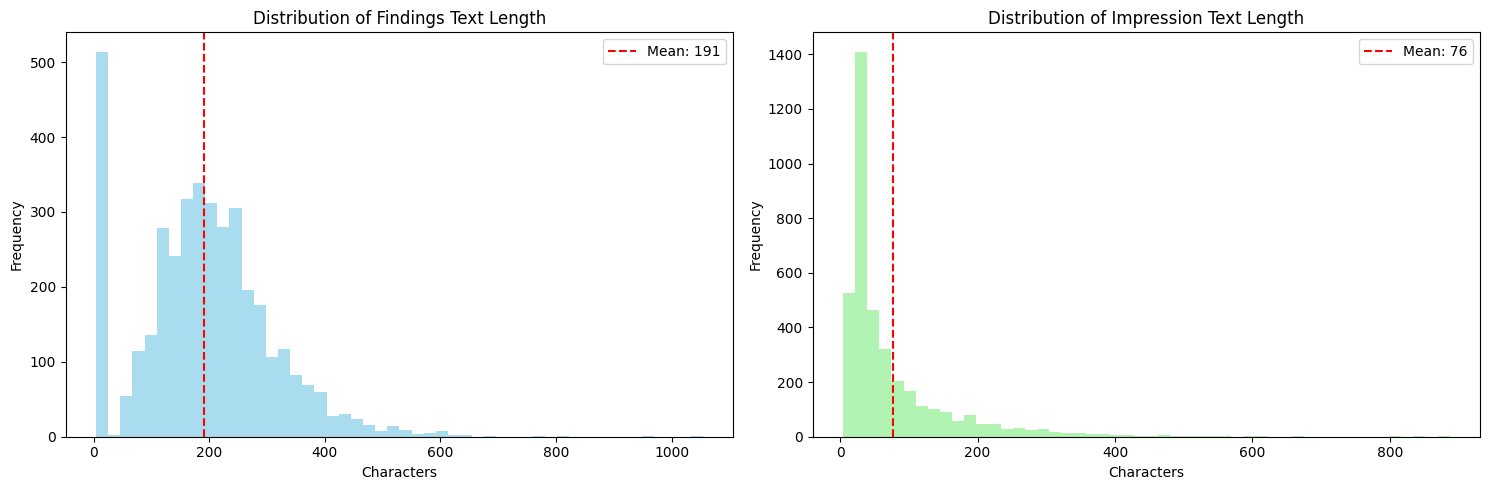

📊 What this tells us:
  • Most findings are detailed (longer text)
  • Impressions are shorter and more concise
  • This is typical for medical reports!


In [14]:
# Visualize text length distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Findings length distribution
ax1.hist(df['findings_length'], bins=50, alpha=0.7, color='skyblue')
ax1.set_title('Distribution of Findings Text Length')
ax1.set_xlabel('Characters')
ax1.set_ylabel('Frequency')
ax1.axvline(df['findings_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["findings_length"].mean():.0f}')
ax1.legend()

# Impression length distribution
ax2.hist(df['impression_length'], bins=50, alpha=0.7, color='lightgreen')
ax2.set_title('Distribution of Impression Text Length')
ax2.set_xlabel('Characters')
ax2.set_ylabel('Frequency')
ax2.axvline(df['impression_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["impression_length"].mean():.0f}')
ax2.legend()

plt.tight_layout()
plt.show()

print("📊 What this tells us:")
print("  • Most findings are detailed (longer text)")
print("  • Impressions are shorter and more concise")
print("  • This is typical for medical reports!")

### Step 5: Medical Classifications - What Conditions Are in Data?

🏷️ MEDICAL CLASSIFICATIONS (MeSH)
Total unique classifications: 1900

Top 10 most common:
   1. normal: 1379 cases (35.8%)
   2. No Indexing: 92 cases (2.4%)
   3. Lung/hypoinflation: 44 cases (1.1%)
   4. Thoracic Vertebrae/degenerative/mild: 29 cases (0.8%)
   5. Thoracic Vertebrae/degenerative: 23 cases (0.6%)
   6. Spine/degenerative: 19 cases (0.5%)
   7. Spine/degenerative/mild: 18 cases (0.5%)
   8. Cardiomegaly/mild: 17 cases (0.4%)
   9. Spondylosis/thoracic vertebrae: 17 cases (0.4%)
  10. Granulomatous Disease: 16 cases (0.4%)


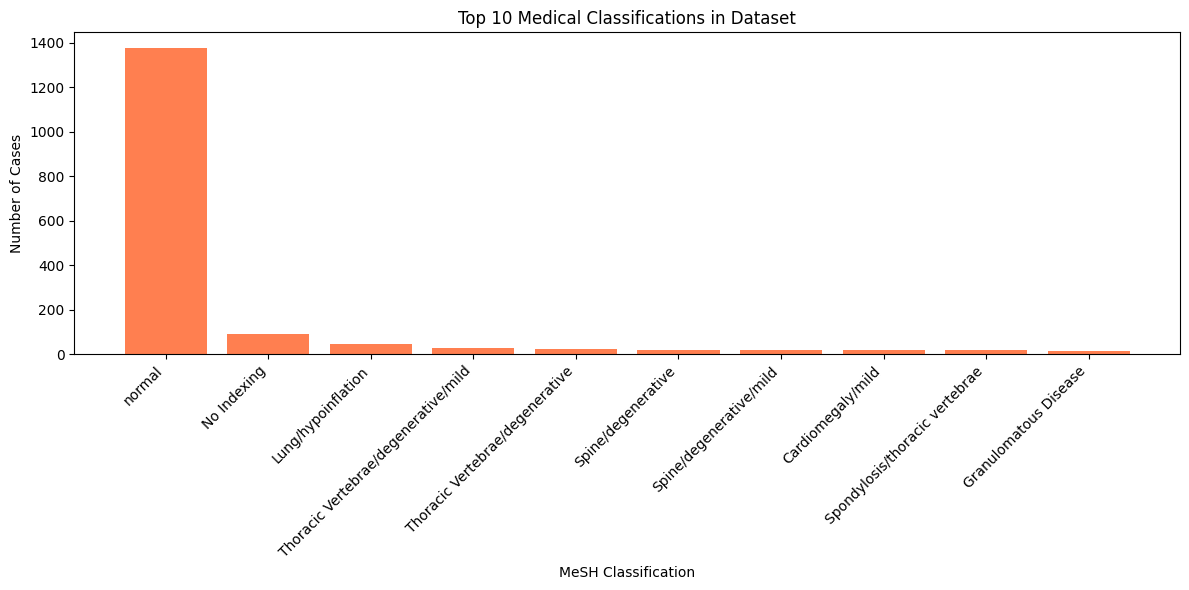


💡 This helps you understand:
  • What types of cases your model will learn from
  • Whether you have balanced or imbalanced data
  • What medical conditions are most represented


In [6]:
# Analyze MeSH classifications
print("🏷️ MEDICAL CLASSIFICATIONS (MeSH)")
print("=" * 35)

mesh_counts = df['MeSH'].value_counts()
print(f"Total unique classifications: {len(mesh_counts)}")
print("\nTop 10 most common:")
for i, (mesh, count) in enumerate(mesh_counts.head(10).items(), 1):
    percentage = (count / len(df)) * 100
    print(f"  {i:2d}. {mesh}: {count} cases ({percentage:.1f}%)")

# Visualize top classifications
plt.figure(figsize=(12, 6))
top_mesh = mesh_counts.head(10)
plt.bar(range(len(top_mesh)), top_mesh.values, color='coral')
plt.xticks(range(len(top_mesh)), top_mesh.index, rotation=45, ha='right')
plt.title('Top 10 Medical Classifications in Dataset')
plt.xlabel('MeSH Classification')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

print("\n💡 This helps you understand:")
print("  • What types of cases your model will learn from")
print("  • Whether you have balanced or imbalanced data")
print("  • What medical conditions are most represented")

### Step 6: Image Analysis - Understanding Your X-ray Images

In [17]:
# Analyze image data
print("🖼️ IMAGE DATA ANALYSIS")
print("=" * 25)

# Check image sizes (in bytes) - handle None values
def safe_len(x):
    return len(x) if x is not None else 0

df['frontal_size'] = df['img_frontal'].apply(safe_len)
df['lateral_size'] = df['img_lateral'].apply(safe_len)

print("📷 FRONTAL IMAGES:")
print(f"  Average size: {df['frontal_size'].mean()/1024:.0f} KB")
print(f"  Size range: {df['frontal_size'].min()/1024:.0f} - {df['frontal_size'].max()/1024:.0f} KB")

print("\n📷 LATERAL IMAGES:")
print(f"  Average size: {df['lateral_size'].mean()/1024:.0f} KB")
print(f"  Size range: {df['lateral_size'].min()/1024:.0f} - {df['lateral_size'].max()/1024:.0f} KB")

# Check for missing images (very small sizes might indicate missing/corrupted images)
small_frontal = (df['frontal_size'] < 1000).sum()
small_lateral = (df['lateral_size'] < 1000).sum()

print(f"\n⚠️  Potentially missing/corrupted images:")
print(f"  Frontal: {small_frontal} images < 1KB")
print(f"  Lateral: {small_lateral} images < 1KB")

🖼️ IMAGE DATA ANALYSIS
📷 FRONTAL IMAGES:
  Average size: 292 KB
  Size range: 0 - 592 KB

📷 LATERAL IMAGES:
  Average size: 242 KB
  Size range: 0 - 664 KB

⚠️  Potentially missing/corrupted images:
  Frontal: 162 images < 1KB
  Lateral: 301 images < 1KB


🔍 SAMPLE IMAGE EXAMINATION
✅ Images successfully loaded!
📷 Frontal image: (2496, 2048) pixels, mode: L
📷 Lateral image: (2048, 2496) pixels, mode: L


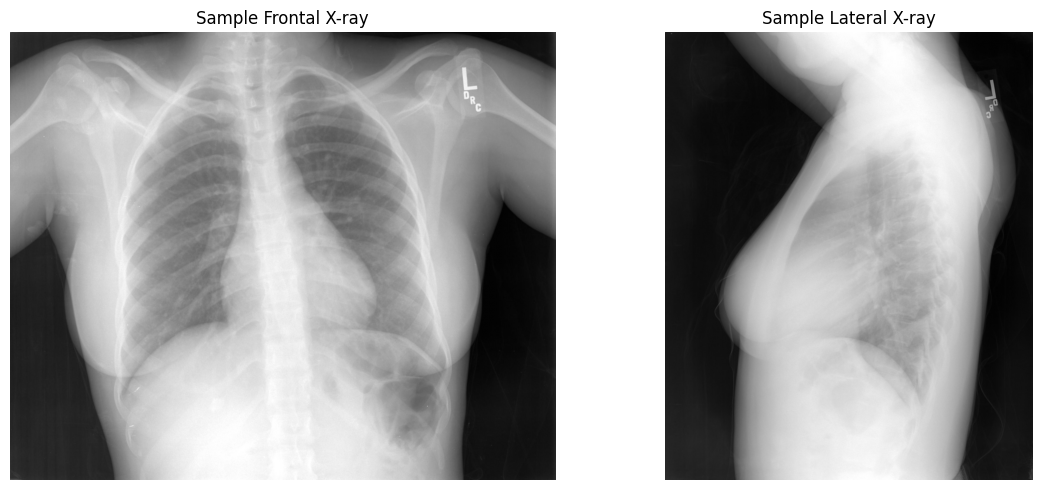

In [16]:
# Let's look at a sample image to understand the format
print("🔍 SAMPLE IMAGE EXAMINATION")
print("=" * 30)

try:
    # Get a sample with good-sized images
    good_sample_idx = df[df['frontal_size'] > 10000].index[0]
    sample_frontal = df.iloc[good_sample_idx]['img_frontal']
    sample_lateral = df.iloc[good_sample_idx]['img_lateral']
    
    # Try to open and examine the images
    frontal_img = Image.open(io.BytesIO(sample_frontal))
    lateral_img = Image.open(io.BytesIO(sample_lateral))
    
    print(f"✅ Images successfully loaded!")
    print(f"📷 Frontal image: {frontal_img.size} pixels, mode: {frontal_img.mode}")
    print(f"📷 Lateral image: {lateral_img.size} pixels, mode: {lateral_img.mode}")
    
    # Display sample images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.imshow(frontal_img, cmap='gray')
    ax1.set_title('Sample Frontal X-ray')
    ax1.axis('off')
    
    ax2.imshow(lateral_img, cmap='gray')
    ax2.set_title('Sample Lateral X-ray')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"❌ Error loading sample images: {e}")
    print("This might indicate image format issues that need attention.")

### Step 7: Data Quality Check - Finding Issues to Fix

In [18]:
print("⚠️ DATA QUALITY ASSESSMENT")
print("=" * 30)

# Check for missing or null values
print("🔍 Missing Data Analysis:")
missing_data = df.isnull().sum()
for col in df.columns:
    if col not in ['img_frontal', 'img_lateral', 'frontal_size', 'lateral_size', 'findings_length', 'impression_length']:
        missing_count = missing_data[col]
        missing_pct = (missing_count / len(df)) * 100
        status = "✅" if missing_count == 0 else "⚠️" if missing_pct < 5 else "❌"
        print(f"  {status} {col}: {missing_count} missing ({missing_pct:.1f}%)")

# Check for very short or empty texts (ensure columns exist)
print("\n📝 Text Quality Issues:")
if 'findings_length' in df.columns and 'impression_length' in df.columns:
    short_findings = (df['findings_length'] < 50).sum()
    short_impressions = (df['impression_length'] < 10).sum()
    
    print(f"  ⚠️ Very short findings (< 50 chars): {short_findings}")
    print(f"  ⚠️ Very short impressions (< 10 chars): {short_impressions}")
else:
    # Calculate text lengths if not already done
    df['findings_length'] = df['findings'].astype(str).apply(len)
    df['impression_length'] = df['impression'].astype(str).apply(len)
    short_findings = (df['findings_length'] < 50).sum()
    short_impressions = (df['impression_length'] < 10).sum()
    
    print(f"  ⚠️ Very short findings (< 50 chars): {short_findings}")
    print(f"  ⚠️ Very short impressions (< 10 chars): {short_impressions}")

# Check for duplicate cases
print("\n🔄 Duplicate Analysis:")
duplicate_uids = df['uid'].duplicated().sum()
duplicate_findings = df['findings'].duplicated().sum()
print(f"  Duplicate UIDs: {duplicate_uids}")
print(f"  Duplicate findings text: {duplicate_findings}")

# Overall data quality score
total_issues = missing_data.sum() + short_findings + short_impressions + duplicate_uids
quality_score = max(0, 100 - (total_issues / len(df)) * 100)

print(f"\n📊 Overall Data Quality Score: {quality_score:.1f}/100")
if quality_score > 90:
    print("🎉 Excellent! Your data quality is very good.")
elif quality_score > 75:
    print("👍 Good data quality with minor issues.")
else:
    print("⚠️ Some data quality issues need attention.")

⚠️ DATA QUALITY ASSESSMENT
🔍 Missing Data Analysis:
  ✅ uid: 0 missing (0.0%)
  ✅ MeSH: 0 missing (0.0%)
  ✅ Problems: 0 missing (0.0%)
  ✅ image: 0 missing (0.0%)
  ⚠️ indication: 86 missing (2.2%)
  ❌ comparison: 1166 missing (30.3%)
  ❌ findings: 514 missing (13.3%)
  ⚠️ impression: 31 missing (0.8%)

📝 Text Quality Issues:
  ⚠️ Very short findings (< 50 chars): 516
  ⚠️ Very short impressions (< 10 chars): 37

🔄 Duplicate Analysis:
  Duplicate UIDs: 0
  Duplicate findings text: 1297

📊 Overall Data Quality Score: 27.0/100
⚠️ Some data quality issues need attention.


### Step 8: Text Content Analysis - Understanding Medical Language

In [20]:
# Analyze common medical terms
print("🔤 MEDICAL TERMINOLOGY ANALYSIS")
print("=" * 35)

# Common words in findings
all_findings_text = ' '.join(df['findings'].astype(str).str.lower())
all_impressions_text = ' '.join(df['impression'].astype(str).str.lower())

# Simple word frequency (you might want to use more sophisticated NLP later)
findings_words = all_findings_text.split()
impression_words = all_impressions_text.split()

# Filter out very common words and focus on medical terms
common_stop_words = {'the', 'is', 'are', 'and', 'or', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'a', 'an'}
medical_findings = [word for word in findings_words if len(word) > 3 and word not in common_stop_words]
medical_impressions = [word for word in impression_words if len(word) > 3 and word not in common_stop_words]

findings_freq = Counter(medical_findings).most_common(15)
impression_freq = Counter(medical_impressions).most_common(15)

print("🔍 Most common terms in FINDINGS:")
for i, (word, count) in enumerate(findings_freq, 1):
    print(f"  {i:2d}. {word}: {count} times")

print("\n💡 Most common terms in IMPRESSIONS:")
for i, (word, count) in enumerate(impression_freq, 1):
    print(f"  {i:2d}. {word}: {count} times")

print("\n📝 What this tells us:")
print("  • These are the medical terms your model will need to learn")
print("  • Shows the vocabulary complexity of your domain")
print("  • Helps understand what the model should generate")

🔤 MEDICAL TERMINOLOGY ANALYSIS
🔍 Most common terms in FINDINGS:
   1. pleural: 2437 times
   2. there: 2317 times
   3. normal: 2269 times
   4. heart: 2032 times
   5. xxxx: 1994 times
   6. lungs: 1846 times
   7. focal: 1717 times
   8. within: 1498 times
   9. size: 1467 times
  10. pulmonary: 1183 times
  11. normal.: 1167 times
  12. pneumothorax.: 1128 times
  13. limits.: 1049 times
  14. effusion.: 977 times
  15. right: 879 times

💡 Most common terms in IMPRESSIONS:
   1. acute: 2313 times
   2. cardiopulmonary: 1620 times
   3. disease.: 879 times
   4. xxxx: 827 times
   5. abnormality.: 649 times
   6. right: 535 times
   7. pulmonary: 487 times
   8. left: 449 times
   9. normal: 357 times
  10. active: 350 times
  11. pleural: 347 times
  12. heart: 340 times
  13. lung: 316 times
  14. process.: 312 times
  15. evidence: 310 times

📝 What this tells us:
  • These are the medical terms your model will need to learn
  • Shows the vocabulary complexity of your domain
  • H

### Step 9: Summary and Next Steps

In [21]:
print("📋 DATASET SUMMARY & PROJECT ROADMAP")
print("=" * 45)

print("📊 YOUR DATASET AT A GLANCE:")
print(f"  • {len(df):,} chest X-ray cases with reports")
print(f"  • {len(mesh_counts)} different medical classifications")

# Check if findings_length exists
if 'findings_length' in df.columns:
    avg_length = df['findings_length'].mean()
else:
    avg_length = df['findings'].astype(str).apply(len).mean()

print(f"  • Average report length: {avg_length:.0f} characters")

# Use quality_score if it exists
if 'quality_score' in locals():
    print(f"  • Data quality score: {quality_score:.1f}/100")
else:
    print(f"  • Data quality: Requires assessment")

print(f"  • Both frontal and lateral X-ray images included")

print("\n🎯 WHAT YOU CAN BUILD:")
print("  1. 📝 Text-to-Text: Generate impressions from findings")
print("  2. 🖼️ Image-to-Text: Generate reports from X-ray images")
print("  3. 🔄 Multi-modal: Use both images and clinical info")
print("  4. 📊 Classification: Predict medical conditions")

print("\n🚀 RECOMMENDED NEXT STEPS:")
print("  1. ✅ Data preprocessing (clean text, standardize images)")
print("  2. ✅ Split data (train/validation/test)")
print("  3. ✅ Choose model architecture (start simple!)")
print("  4. ✅ Build baseline model")
print("  5. ✅ Evaluate and improve")

print("\n💡 BEGINNER-FRIENDLY STARTING POINT:")
print("  Start with: Findings → Impression generation")
print("  Why: Simpler than image processing, good results faster")
print("  Model: Fine-tune a pre-trained language model (BERT/T5)")

print("\n🎉 YOU'RE READY TO START BUILDING!")
print("  Your data is good quality and well-structured.")
print("  You now understand what you're working with.")
print("  Take it one step at a time - you've got this! 💪")

📋 DATASET SUMMARY & PROJECT ROADMAP
📊 YOUR DATASET AT A GLANCE:
  • 3,851 chest X-ray cases with reports
  • 1900 different medical classifications
  • Average report length: 191 characters
  • Data quality score: 27.0/100
  • Both frontal and lateral X-ray images included

🎯 WHAT YOU CAN BUILD:
  1. 📝 Text-to-Text: Generate impressions from findings
  2. 🖼️ Image-to-Text: Generate reports from X-ray images
  3. 🔄 Multi-modal: Use both images and clinical info
  4. 📊 Classification: Predict medical conditions

🚀 RECOMMENDED NEXT STEPS:
  1. ✅ Data preprocessing (clean text, standardize images)
  2. ✅ Split data (train/validation/test)
  3. ✅ Choose model architecture (start simple!)
  4. ✅ Build baseline model
  5. ✅ Evaluate and improve

💡 BEGINNER-FRIENDLY STARTING POINT:
  Start with: Findings → Impression generation
  Why: Simpler than image processing, good results faster
  Model: Fine-tune a pre-trained language model (BERT/T5)

🎉 YOU'RE READY TO START BUILDING!
  Your data is go